In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
Astronaut = pd.read_csv('astronauts.csv')
Astronaut.head(5)

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN


In [5]:
Astronaut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 357 non-null    object 
 1   Year                 330 non-null    float64
 2   Group                330 non-null    float64
 3   Status               357 non-null    object 
 4   Birth Date           357 non-null    object 
 5   Birth Place          357 non-null    object 
 6   Gender               357 non-null    object 
 7   Alma Mater           356 non-null    object 
 8   Undergraduate Major  335 non-null    object 
 9   Graduate Major       298 non-null    object 
 10  Military Rank        207 non-null    object 
 11  Military Branch      211 non-null    object 
 12  Space Flights        357 non-null    int64  
 13  Space Flight (hr)    357 non-null    int64  
 14  Space Walks          357 non-null    int64  
 15  Space Walks (hr)     357 non-null    flo

**Question 1: How many astronauts are there in our dataset?**

In [3]:
len(Astronaut.Name.unique())

357

**Question 2: Out of the total astronauts, how many are Male? How many are Female?**

In [4]:
Male = Astronaut[Astronaut.Gender == 'Male']['Gender'].count()
Female = Astronaut[Astronaut.Gender == 'Female']['Gender'].count()

print('Male Astronauts:', Male)
print('Female Astronauts:', Female)

Male Astronauts: 307
Female Astronauts: 50


**Question 3: What is the average space flights for Male and Female?**

In [6]:
Avg_Spaceflights = Astronaut.groupby('Gender')['Space Flights'].mean()
Avg_Spaceflights.round(2)

Gender
Female    2.40
Male      2.36
Name: Space Flights, dtype: float64

**Question 4: What is the average space flight time in hours for Male and Female?**

In [7]:
Avg_Spaceflights_Hr = Astronaut.groupby('Gender')['Space Flight (hr)'].mean()
Avg_Spaceflights_Hr.round(2)

Gender
Female    1577.30
Male      1195.84
Name: Space Flight (hr), dtype: float64

**Question 5: How many astronauts are active, retired, deceased and with management? How many of them are Male/Female?**

In [9]:
pivot_table = Astronaut.groupby(['Status','Gender']).size().reset_index(name='Count').pivot_table(index = 'Status', columns = 'Gender', aggfunc=np.sum, fill_value = 0, margins = True, margins_name = 'Total')
pivot_table

Count           
Gender     Female Male Total
Status                      
Active         13   37    50
Deceased        7   44    51
Management      6   30    36
Retired        24  196   220
Total          50  307   357

**Question 6: Which 5 Astronauts have the highest Space Flights (Hr)?**

In [11]:
Sorted_Spaceflights_Hr = Astronaut.sort_values(by = 'Space Flight (hr)', ascending = False)
Sorted_Spaceflights_Hr[['Name','Space Flight (hr)']].head(5)

,Name,Space Flight (hr)
346,Jeffrey N. Williams,12818
183,Scott J. Kelly,12490
342,Peggy A. Whitson,11698
107,E. Michael Fincke,9159
111,C. Michael Foale,8970


**Question 7: In the list of astronauts, are there any astronauts who did not travel in Space?**

In [12]:
Lowest_spaceflight = Sorted_Spaceflights_Hr[Sorted_Spaceflights_Hr['Space Flight (hr)'] == Sorted_Spaceflights_Hr['Space Flight (hr)'].min()][['Name','Space Flight (hr)']]

Lowest_spaceflight

,Name,Space Flight (hr)
344,Clifton C. Williams Jr.,0
353,Neil W. Woodward III,0
17,Serena M. Aunon,0
66,Philip K. Chapman,0
24,Charles A. Bassett II,0
136,Duane E. Graveline,0
116,Theodore C. Freeman,0
173,Gregory B. Jarvis,0
108,Jack D. Fischer,0
165,Donald L. Holmquest,0


**Question 8: At this point of analysis, What can we infer from the outputs?**

*We can analyse that in the dataset, majorly astronauts are Male. When we compare the space travel time and the space flights between Male and Female, we can see the number of space travel flights and the average space flights (hr) is higher for females compared to males*

**Question 9: Which Military status group has the highest number of astronauts?**

In [50]:
#Checking for the null values
Astronaut.isnull().sum() 

Name                     0
Year                    27
Group                   27
Status                   0
Birth Date               0
Birth Place              0
Gender                   0
Alma Mater               1
Undergraduate Major     22
Graduate Major          59
Military Rank          150
Military Branch        146
Space Flights            0
Space Flight (hr)        0
Space Walks              0
Space Walks (hr)         0
Missions                23
Death Date             305
Death Mission          341
MissionsList            23
MissionCount             0
dtype: int64

In [44]:
Military_Branch = 'Military Branch'
Astronaut1 = Astronaut.dropna(subset = [Military_Branch]) #dropping the NaN rows from 'Military Branch'

# Count the total number of astronauts with the Military status
group_counts = Astronaut1.groupby(['Military Branch']).size()

# Append the total count
group_counts_with_total = group_counts.append(pd.Series(group_counts.sum(), index=['Total']))

# Sort the numbers 
sorted_group_counts = group_counts_with_total.drop('Total').sort_values(ascending = False)

# Display the result
print(sorted_group_counts)

US Air Force (Retired)             61
US Navy (Retired)                  59
US Air Force                       21
US Navy                            21
US Marine Corps (Retired)          17
US Army (Retired)                  13
US Army                             4
US Air Force Reserves (Retired)     3
US Marine Corps                     3
US Air Force Reserves               2
US Coast Guard (Retired)            2
US Marine Corps Reserves            2
US Naval Reserves                   2
US Naval Reserves (Retired)         1
dtype: int64


C:\Users\jaybi\AppData\Local\Temp\ipykernel_10372\1556393210.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group_counts_with_total = group_counts.append(pd.Series(group_counts.sum(), index=['Total']))


**Question 10: Who are the top 5 astronauts who have been on maximum missions?**

In [49]:
#The name of the missions are in one row, with comma-separated for each astronaut

# Split the mission information by comma and create a new column with the split list
Astronaut['MissionsList'] = Astronaut['Missions'].str.split(',')

# Count the number of missions for each scientist
Astronaut['MissionCount'] = Astronaut['MissionsList'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Sort the DataFrame based on the mission count in descending order
sorted_df = Astronaut.sort_values('MissionCount', ascending=False)

# Display the sorted DataFrame with scientists and their respective mission counts
sorted_df[['Name', 'MissionCount']].head(5)

,Name,MissionCount
279,Jerry L. Ross,7
65,Franklin R. Chang-Diaz,7
111,C. Michael Foale,6
355,John W. Young,6
339,James D. Wetherbee,6


**Question 11: Build some visuals from the tables created above.**

<AxesSubplot:xlabel='Gender', ylabel='count'>

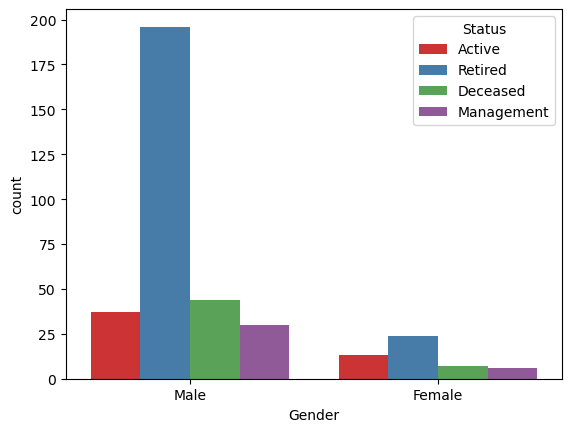

In [51]:
sns.countplot(x='Gender', hue = 'Status',data = Astronaut , palette="Set1")


<AxesSubplot:xlabel='Status', ylabel='count'>

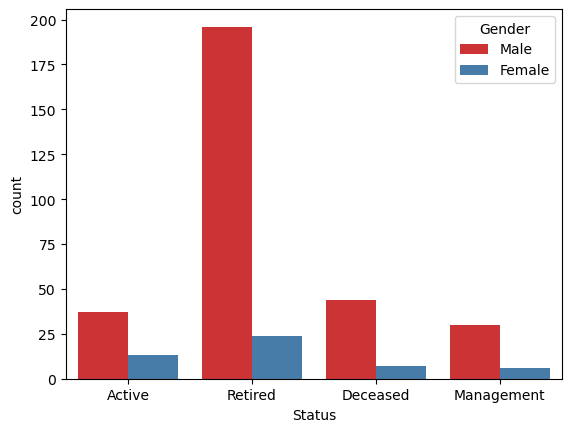

In [53]:
sns.countplot(x='Status', hue = 'Gender',data = Astronaut , palette="Set1")


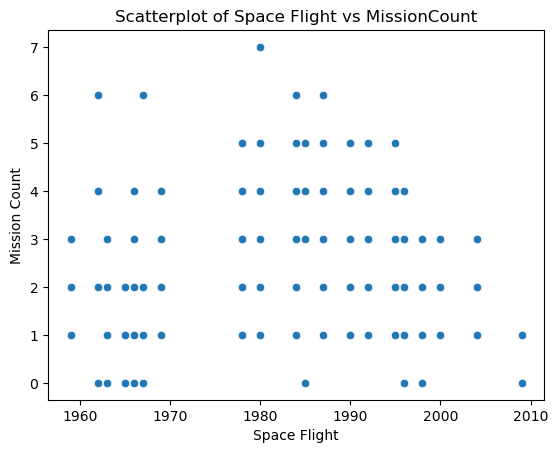

In [54]:
scatter,ax = plt.subplots()

sns.scatterplot ( data = Astronaut, x = 'Year', y = 'Space Flights', ax=ax)
ax.set_title ('Scatterplot of Space Flight vs MissionCount')
ax.set_xlabel('Space Flight')
ax.set_ylabel('Mission Count')

plt.show()